In [19]:
#install library
import pandas as pd

In [20]:
# Read data from csv
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [21]:
# print train data
train_data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,13/09/2021,5446,228,1542655,48
1,14/09/2021,6312,199,1645980,46
2,15/09/2021,5301,189,1732155,42
3,16/09/2021,5735,160,1835394,39
4,17/09/2021,5972,166,1835394,50
...,...,...,...,...,...
100,27/12/2021,560,24,7118291,8
101,28/12/2021,671,29,7125264,7
102,29/12/2021,702,37,7136245,4
103,30/12/2021,697,30,7147477,2


In [22]:
#print test data
test_data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,7/12/2021,965,53,6795458,10
1,20/12/2021,687,50,6881361,8
2,23/11/2021,1204,62,6053986,12
3,21/9/2021,6521,184,2052403,44
4,27/11/2021,1773,57,6547118,13


In [23]:
import math
train_median_percent = math.floor(train_data.residential_percent_change_from_baseline.median())
train_median_percent

13

In [24]:
import math
test_median_percent = math.floor(test_data.residential_percent_change_from_baseline.median())
test_median_percent

12

In [25]:
train_data.residential_percent_change_from_baseline = train_data.residential_percent_change_from_baseline.fillna(train_median_percent)
train_data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,13/09/2021,5446,228,1542655,48
1,14/09/2021,6312,199,1645980,46
2,15/09/2021,5301,189,1732155,42
3,16/09/2021,5735,160,1835394,39
4,17/09/2021,5972,166,1835394,50
...,...,...,...,...,...
100,27/12/2021,560,24,7118291,8
101,28/12/2021,671,29,7125264,7
102,29/12/2021,702,37,7136245,4
103,30/12/2021,697,30,7147477,2


In [26]:
test_data.residential_percent_change_from_baseline = test_data.residential_percent_change_from_baseline.fillna(test_median_percent)
test_data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,7/12/2021,965,53,6795458,10
1,20/12/2021,687,50,6881361,8
2,23/11/2021,1204,62,6053986,12
3,21/9/2021,6521,184,2052403,44
4,27/11/2021,1773,57,6547118,13


In [27]:
x_train= train_data.drop(['case_by_day','day','death_by_day'], axis=1).values
y_train = train_data[['case_by_day','death_by_day']].values

In [28]:
x_test = test_data.drop(['case_by_day','day','death_by_day'], axis=1).values
y_test = test_data[['case_by_day','death_by_day']].values

In [29]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = ml.predict(x_test)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8425780584712215

Text(0.5, 1.0, 'Actual vs. Predicted')

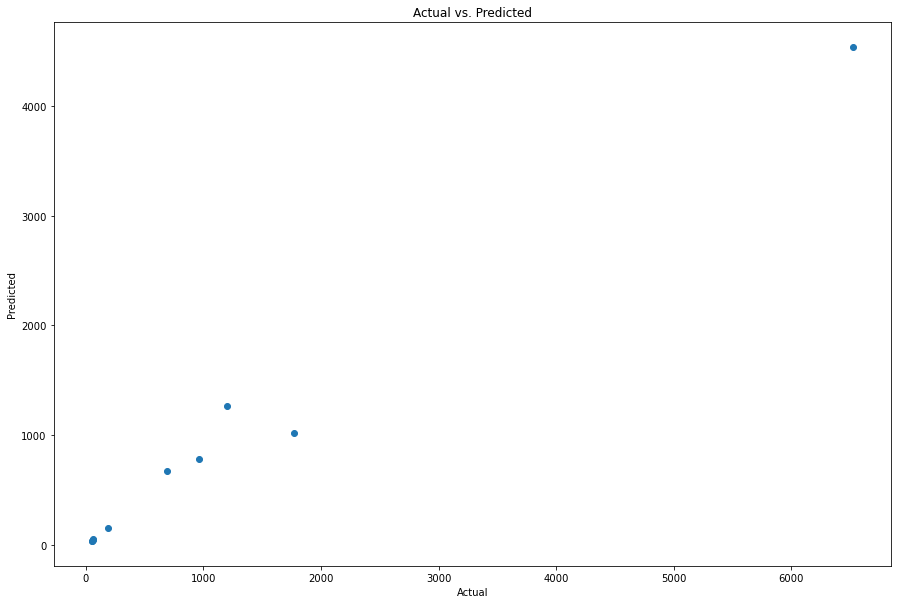

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [33]:
pred_y_df = []
for i in range(0,len(y_test)):
    pred_y_df.append(pd.DataFrame({'Actual cases':y_test[i],'Predicted cases':y_pred[i], 'Difference cases': y_test[i]-y_pred[i]}, index = ["Cases by day", "Deaths by day"]))
pred_y_df


[               Actual cases  Predicted cases  Difference cases
 Cases by day            965       782.120167        182.879833
 Deaths by day            53        38.222232         14.777768,
                Actual cases  Predicted cases  Difference cases
 Cases by day            687        670.01129          16.98871
 Deaths by day            50         33.23997          16.76003,
                Actual cases  Predicted cases  Difference cases
 Cases by day           1204      1264.000342        -60.000342
 Deaths by day            62        49.484830         12.515170,
                Actual cases  Predicted cases  Difference cases
 Cases by day           6521      4539.568268       1981.431732
 Deaths by day           184       154.368917         29.631083,
                Actual cases  Predicted cases  Difference cases
 Cases by day           1773      1017.678842        755.321158
 Deaths by day            57        46.840294         10.159706]

In [34]:
y_pred

array([[ 782.1201667 ,   38.22223243],
       [ 670.0112896 ,   33.23997025],
       [1264.00034168,   49.48483034],
       [4539.56826792,  154.36891727],
       [1017.67884181,   46.84029401]])

In [35]:
y_test

array([[ 965,   53],
       [ 687,   50],
       [1204,   62],
       [6521,  184],
       [1773,   57]])